# Perceptron Learning for Iris Data
___

In this notebook, we will implement the classification perceptron algorithm for the **iris** dataset. It is important to note that the way we implement the algorithm in this notebook is neither efficient, nor is it the way you would truly implement a neural network in practice (indeed, a perceptron model is a special case of a neural network). This example is set up to be pedagogical, such that you better understand the mechanism underlying the perceptron.

### 🧑‍💻 <font color=green>**Your Task**</font>


___
## Data pre-processing

In [1]:
# Import necessary packages
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
np.random.seed(1) # Set the random seed for reproduceability

To simplify the task, we are going to use only two features, the **sepal width** and the **petal width**. Furthermore, we will reduce our dataset to only contain **setosa** and **versicolor** species, i.e., we will drop the **virginica** species.

In [2]:
# Read in the iris dataset
iris = pd.read_csv("data/iris.csv")
# Keep only sepal width, petal width, and species
iris.drop(columns=["sepal length (cm)", "petal length (cm)"], inplace=True)
# Drop all observations of the species virginica
iris = iris.loc[iris["species"] != "virginica"]
# Shuffle the dataset
iris = iris.sample(frac=1)
iris # Display the dataset

,species,sepal width (cm),petal width (cm)
130,versicolor,2.4,1.1
134,versicolor,3.0,1.5
36,setosa,3.1,0.2
131,versicolor,2.4,1.0
143,versicolor,2.3,1.0
...,...,...,...
125,versicolor,3.0,1.4
12,setosa,3.0,0.2
122,versicolor,2.5,1.5
15,setosa,3.5,0.2


___
#### 🤔 <font color=green>**Question 1**</font>
Notice how, in the above code, we use `iris.sample(frac=1)` to shuffle our data. Why would we prefer the data to be randomly ordered? How would things turn out if we left out the reshuffling?
___



We have a dataset of size $n=100$ with with two features $\mathbf{x}_1$ and $\mathbf{x}_2$ (in our case petal length and sepal length), and a target $\mathbf{y}$ (in our case species) which we are trying to predict based on the information from the features. Both features $\mathbf{x}_1$ and $\mathbf{x}_2$ are numerical variables, so they are ready for mathematical and statistical calculations. However, we cannot say the same about out target variable species which contains string values. Machine learning completely happens in the language of numbers mathematics, so we need to translate the information in species into numbers. One possible way to do so is to assign the value $-1$ to every **setosa** observation and the value $+1$ to every **versicolor** observation. This is somewhat arbitrary, as there are many other ways to encode this variable in numbers. They would all result in a learning process that is equally good. E.g., an alternative example would be using target labels $0$ and $+1$. Both types of "translations" ($-1$ and 1, and $0$ and $1$) are very common. For now, we use the first version since this allows us naturally to talk about "negatives" (setosa) and "positives" (versicolor).

In [3]:
selection = ["sepal width (cm)", "petal width (cm)"]
iris[selection] = (iris[selection] - iris[selection].mean(axis=0))/iris[selection].std(axis=0)

# Create the matrix of features
X = np.array(iris[["sepal width (cm)", "petal width (cm)"]])
X.shape

(100, 2)

In [4]:
iris.describe()

,sepal width (cm),petal width (cm)
count,1.000000e+02,1.000000e+02
mean,4.929390e-16,-9.325873e-17
std,1.000000e+00,1.000000e+00
min,-2.295615e+00,-1.213830e+00
25%,-6.245576e-01,-1.036887e+00
50%,-1.023522e-01,2.477205e-02
75%,6.287352e-01,9.094881e-01
max,2.717557e+00,1.794204e+00


We mentioned above how $\mathbf{x}_1$ and $\mathbf{x}_2$ are our two features. We can also use a matrix $\mathbf{X} = [\mathbf{x}_1 \, \mathbf{x}_2]$ to represent our features. This matrix is a simple $100 \times 2$ matrix, i.e., the first colum is the sepal width and the second one is the petal width. Every row represents a different observation. As we remeber, this matrix with the feature value is called a **design matrix**.

In [5]:
# Create the vector of labels / targets
y = np.where(iris["species"] == "versicolor", 1, -1)

y.shape

(100,)

For the labels, we dont need a matrix, a column vector of length $n=100$ will do just fine. 

### The perceptron learning model



In line with neural-network terminology, we now call $\beta_0$ a "bias" and $\boldsymbol{\beta}$ weights. We introduce our usual linear model and call it score

$$
score = \beta_0 + \beta_1 \; petal\_width + \beta_2 \; sepal\_width
$$


___
#### ➡️ ✏️<font color=green>**Question 2**</font>

Complete the code below such that we realize the perceptron model. Run the perceptron algorithm with the learning rate set to 0.01 and 0. Of which algorithm does the perceptron algorithm remind you when the learning rate is strictly positive?
___


In [6]:
def activation(z):
    if z > 0:
        return 1
    else:
        return -1

In [7]:
# Initialize parameters for the learning process
eta = 0.01 # The learning rate, this is an example of what is called a HYPERPARAMETER
b = 0 # The bias
w = np.zeros(X.shape[1]) # The weights (one for each feature)

beta = np.zeros(X.shape[1]) # The weights/parameters initialized with 0

# Initialize lists for bookkeeping
bias_list = []
weights_list = []

# Iterate over each iris case

for i in range(X.shape[0]):

    # Extract the ith row of the features matrix
    x_i = X[i, :]
    # Extract the ith row of the label vector 
    y_i = y[i]
    
    # Compute the score
    score_i = b + w[0] * x_i[0] + w[1] * x_i[1]


    # Make a prediction based on the score
    # -1 (setosa) if score is negative (or zero), +1 (versicolor) if score is positive
    pred_i = activation(score_i)

    
    # Bookkeeping of current weights and biases before we update them
    bias_list.append(b)
    weights_list.append(w.copy())  
    
    # Update the weights and bias
    b += eta * (y_i - pred_i)
    w += eta * (y_i - pred_i) * x_i
    
# Get the output
print(f"The resulting bias is {b}, the resulting weights are {w}.")

The resulting bias is 0.0, the resulting weights are [-0.01671057  0.05662183].


#### Calculating classification metrics

___
#### ➡️ ✏️<font color=green>**Question 3**</font>

Evaluate how the perceptron classifier performs in its task.
___


In [8]:
# TODO Delete solution

# Iterate over the learning steps of the perceptron algorithm

# Create some empty lists as containers that are going to be filled
misclassifications = []
false_positives = []
false_negatives = []

for i in range(len(bias_list)):
    # Compute score over FULL dataset (notice the matrix multiplication!)
    score = bias_list[i] + X @ weights_list[i].T
    
    # Compute the prediction over the full dataset
    pred = np.where(score >= 0, 1, -1)
    
    # Compute missclassification, false positives, false negatives
    error = y - pred
    misclassifications.append(sum(error != 0))
    false_positives.append(100 * sum(error != 0) / sum(y == 1))
    false_negatives.append(100 * sum(error != 0) / sum(y == -1))

print(misclassifications)

[50, 18, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0]


___
#### ➡️ ✏️<font color=green>**Question 5**</font>
Create a scatter plot of the data such that:
+ the sepal length is displayed on the x-axis
+ the petal length is displayed on the y-axis
+ setosa data points are colored in blue and versicolor data points are colored in green
+ there is a legend showing which color belongs to which iris species
+ the x- and y-axis are labeled

Text(0, 0.5, 'Petal width (cm)')

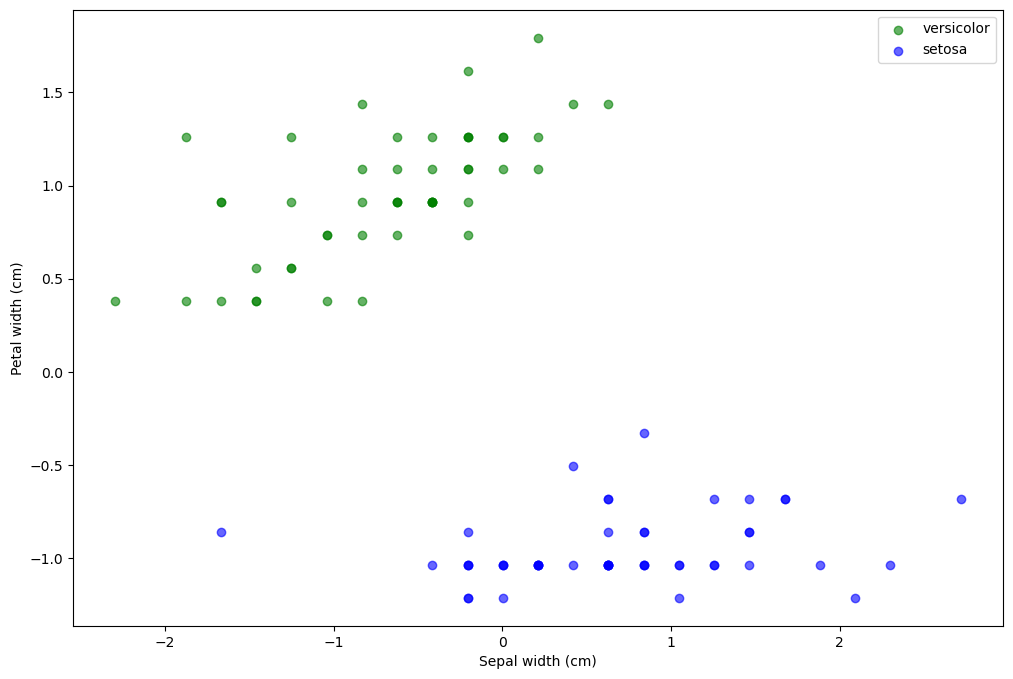

In [9]:
# Enter your code here

fig, ax = plt.subplots(figsize=(12, 8))
color_map = {"setosa": "blue", "versicolor": "green"}
for species in iris["species"].unique():
    subset = iris.loc[iris["species"] == species, :]
    ax.scatter(subset["sepal width (cm)"], subset["petal width (cm)"], alpha=.6,
              label=species, color=color_map[species])
ax.legend() # Add legend
# Add x- and y-labels
ax.set_xlabel("Sepal width (cm)")
ax.set_ylabel("Petal width (cm)")

#### Solution

___
#### ➡️ ✏️<font color=green>**Question 6**</font>
In fact, the perceptron algorithm as used here separates the feature space linearly, i.e., it *draws a line* in the above plot. Using the final weights and bias obtained by our algorithm, can you characterize this line in a mathematical equation? *Hint:* Express the equation in the form $x_2 = a + m \cdot x_1 $. Do not use any coding but use paper and pencil (maybe a digital version of those).

In [10]:
# Print out the final optimal values obtained by the perceptron


\begin{aligned} 0 & =b+w_{1} \cdot x_{1}+w_{2} \cdot x_{2} \\ -w_{2} \cdot x_{2} & =b+w_{1} \cdot x_{1} \\ x_{2} & =-\frac{b+w_{1} \cdot x_{1}}{w_{2}} \\ x_{2} & =-\frac{b}{w_{2}}-\frac{w_{1}}{w_{2}} \cdot x_{1}\end{aligned}

___

___
#### ➡️ ✏️<font color=green>**Question 7**</font>

1. Using the line equation you have determined in the previous task, augment the plot you created in Question 5 by drawing the perceptron classification line.


2. Why actually do we benefit from including the bias $b$ in the perceptron model? Try to answer this question based on your calculation in Question 6 and the plot you just created.

In [11]:
# Enter your code here


Text(0, 0.5, 'Petal width (cm)')

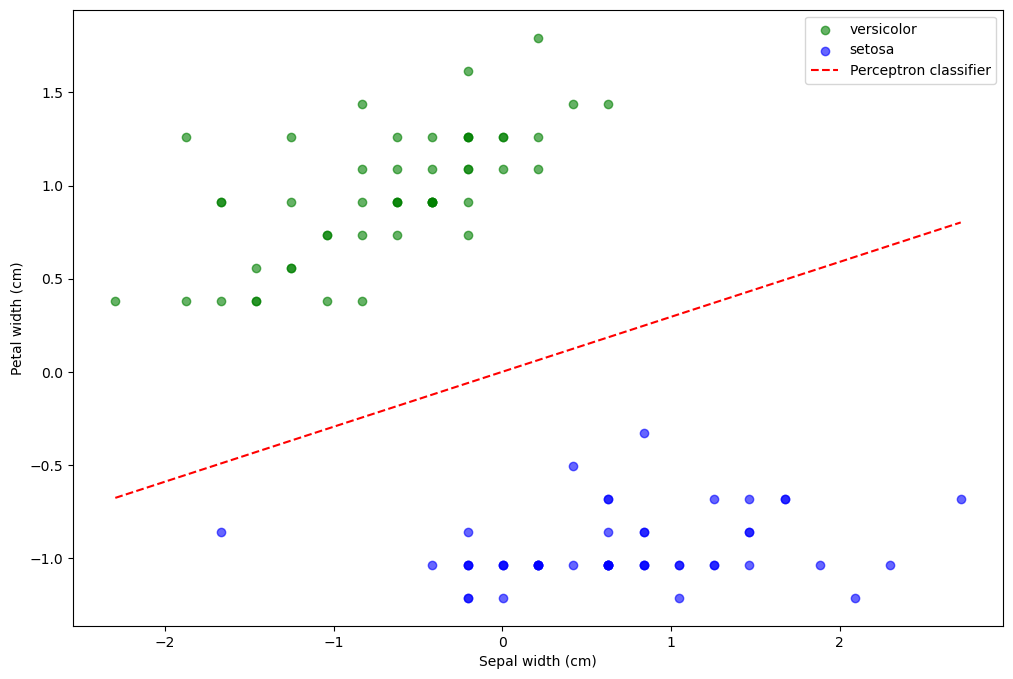

In [12]:
# Set up the canvas
fig, ax = plt.subplots(figsize=(12, 8))
# Define the color map
color_map = {"setosa": "blue", "versicolor": "green"}
# Iterate over the species and add a series for each
for species in iris["species"].unique():
    subset = iris.loc[iris["species"] == species, :]
    ax.scatter(subset["sepal width (cm)"], subset["petal width (cm)"], alpha=.6,
              label=species, color=color_map[species])
# Draw the classification line
xs = np.linspace(X[:, 0].min(), X[:, 0].max())
ys = -(b + w[0] * xs)/w[1]
plt.plot(xs, ys, "--r", label="Perceptron classifier")
ax.legend() # Add legend
# Add x- and y-labels
ax.set_xlabel("Sepal width (cm)")
ax.set_ylabel("Petal width (cm)")

#### Solution

___
#### ➡️ ✏️<font color=green>**Question 8**</font>

Create a visualization of the learning process. This plot should contain the following:
+ the iteration numbers on the horizontal axis
+ a dashed line with the number of misclassifications in blue
+ a dash-dotted line with the false positive rates in green
+ a dotted line with the false negative rates in orange
+ add a grid
+ don't forget to label your axes and add a legend!

Discuss and interpret the results of this plot with your classmates. Are you surprised by what you see? Using your common sense, do you like the result?


#### Solution

Text(0, 0.5, 'Count')

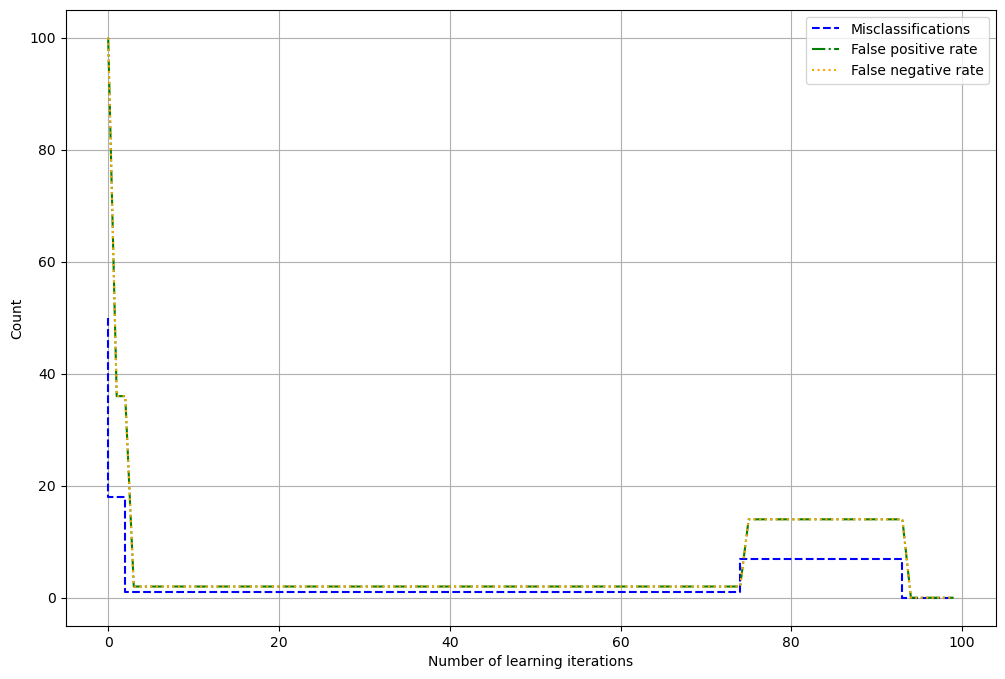

In [13]:
# Define the x-axis
xs = range(len(misclassifications))
# Set up the canvas
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the misclassifications
ax.step(xs, misclassifications, "--", label="Misclassifications", color="blue")
# Plot the false positives
ax.plot(xs, false_positives, "-.", label="False positive rate", color="green")
# Plots the false negatives
ax.plot(xs, false_negatives, ":", label="False negative rate", color="orange")
# Add the grid, add the legend and label the axes
ax.grid(True)
ax.legend()
ax.set_xlabel("Number of learning iterations")
ax.set_ylabel("Count")